<a href="https://colab.research.google.com/github/Nilo-Ninja/Investimento/blob/master/Investimentos_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importando bibliotecas

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=d512e85c1c6e75722e97e9090e4f44bdee8c854977149720a72c9fb547f3d0c9
  Stored in directory: /tmp/pip-ephem-wheel-cache-phrb5ngu/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2. Obtendo e tratando os dados

In [ ]:
tickers = "^BVSP USDBRL=X"
carteira = yf.download(tickers, start="2007-01-01")["Close"]

[*********************100%***********************]  2 of 2 completed


In [ ]:
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-01,2.1325,NaN
2007-01-02,2.1310,45383.000000
2007-01-03,2.1345,44445.000000
2007-01-04,2.1390,44020.000000
2007-01-05,2.1470,42245.000000
...,...,...
2020-07-30,5.1688,105009.000000
2020-07-31,5.1539,102912.000000
2020-08-03,5.2212,102830.000000


In [ ]:
carteira = carteira.dropna()
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-02,2.1310,45383.000000
2007-01-03,2.1345,44445.000000
2007-01-04,2.1390,44020.000000
2007-01-05,2.1470,42245.000000
2007-01-08,2.1465,42830.000000
...,...,...
2020-07-30,5.1688,105009.000000
2020-07-31,5.1539,102912.000000
2020-08-03,5.2212,102830.000000


In [ ]:
carteira.columns = ["DOLAR", "IBOV"]
carteira

,DOLAR,IBOV
Date,,
2007-01-02,2.1310,45383.000000
2007-01-03,2.1345,44445.000000
2007-01-04,2.1390,44020.000000
2007-01-05,2.1470,42245.000000
2007-01-08,2.1465,42830.000000
...,...,...
2020-07-30,5.1688,105009.000000
2020-07-31,5.1539,102912.000000
2020-08-03,5.2212,102830.000000


# 3. Resultados


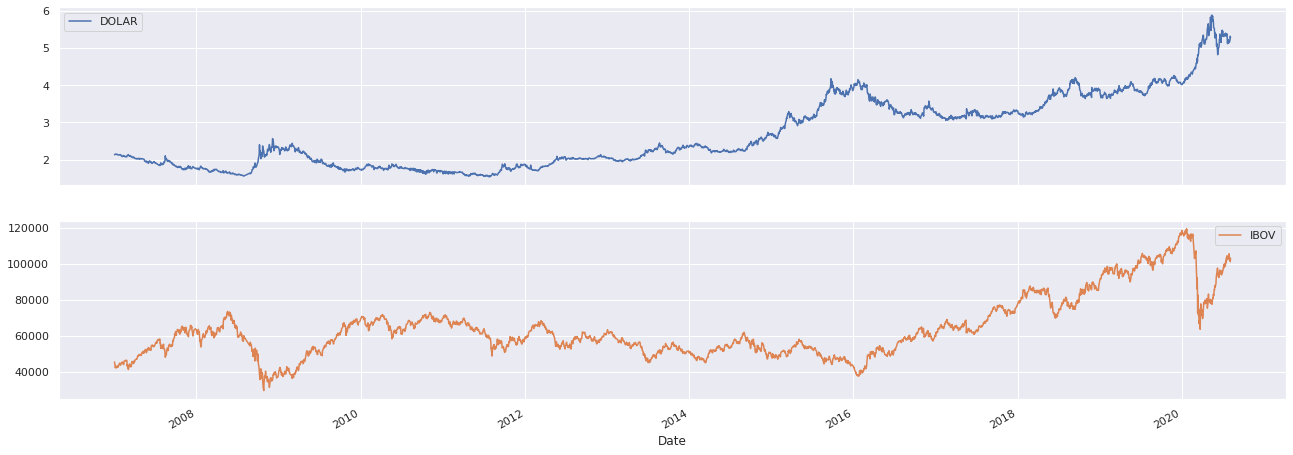

In [ ]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8));

In [ ]:
retornos = carteira.pct_change()[1:]
retornos

,DOLAR,IBOV
Date,,
2007-01-03,0.001642,-0.020669
2007-01-04,0.002108,-0.009562
2007-01-05,0.003740,-0.040323
2007-01-08,-0.000233,0.013848
2007-01-09,0.001165,-0.019216
...,...,...
2020-07-30,0.003202,-0.005644
2020-07-31,-0.002883,-0.019970
2020-08-03,0.013058,-0.000797


In [ ]:
retornos.describe()

,DOLAR,IBOV
count,3325.000000,3325.000000
mean,0.000348,0.000415
std,0.012283,0.018296
min,-0.104792,-0.147797
25%,-0.005850,-0.008502
50%,0.000056,0.000694
75%,0.006321,0.009660
max,0.101524,0.146560


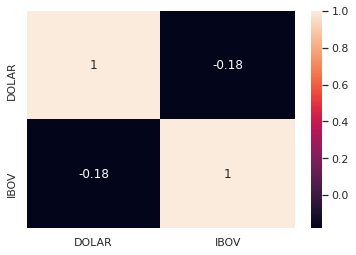

In [ ]:
sns.heatmap(retornos.corr(), annot=True);

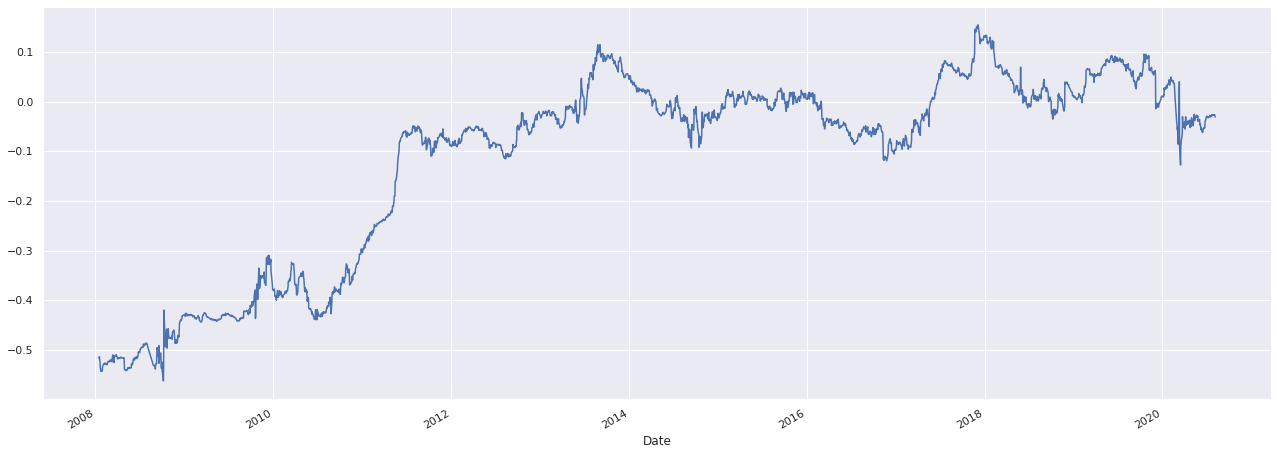

In [ ]:
retornos["DOLAR"].rolling(252).corr(retornos["IBOV"]).plot(figsize=(22,8));

In [ ]:
carteira["IBOV_DOLARIZADO"] = (carteira["IBOV"] / carteira["DOLAR"])
carteira

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DOLAR,IBOV,IBOV_DOLARIZADO
Date,,,
2007-01-02,2.1310,45383.000000,21296.573959
2007-01-03,2.1345,44445.000000,20822.206345
2007-01-04,2.1390,44020.000000,20579.710732
2007-01-05,2.1470,42245.000000,19676.291819
2007-01-08,2.1465,42830.000000,19953.411504
...,...,...,...
2020-07-30,5.1688,105009.000000,20315.934549
2020-07-31,5.1539,102912.000000,19967.790814
2020-08-03,5.2212,102830.000000,19694.706238


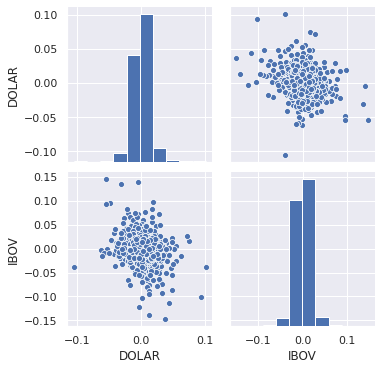

In [ ]:
sns.pairplot(retornos);